We'll implement two classification algorithms which are using all the previous material: probabilities, gradient descent, etc.: 

Logistic regression                                                                                                     
https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F                                                                                  
https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html                                                     
Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y1 = np.array([np.random.rand(1) + 2 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y2 = np.array([np.random.rand(1) + 2.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])

x1 = np.array(range(len(y1)))
x2 = np.array([c+50 for c in range(len(y2))])

In [3]:
# data matrix 
a1 = np.concatenate((x1.reshape(-1,1),y1,np.array([1 for c in range(len(x1))]).reshape(-1,1)), 1)
a2 = np.concatenate((x2.reshape(-1,1),y2,np.array([0 for c in range(len(x2))]).reshape(-1,1)), 1)

A = np.concatenate((a1,a2), 0).round(1)
np.random.shuffle(A)

In [4]:
A.shape, y1.shape[0], y2.shape[0]

((139, 3), 61, 78)

In [5]:
A

array([[114. ,   2.8,   0. ],
       [  4. ,   2.6,   1. ],
       [ 54. ,   3.2,   0. ],
       [ 78. ,   2.8,   0. ],
       [  0. ,   2.5,   1. ],
       [ 84. ,   3.4,   0. ],
       [ 49. ,   2.9,   1. ],
       [ 52. ,   2.6,   1. ],
       [ 59. ,   2.1,   1. ],
       [127. ,   2.5,   0. ],
       [123. ,   2.9,   0. ],
       [ 47. ,   2.1,   1. ],
       [ 45. ,   2.7,   1. ],
       [ 23. ,   2.9,   1. ],
       [ 71. ,   2.7,   0. ],
       [117. ,   2.8,   0. ],
       [ 54. ,   2.6,   1. ],
       [ 35. ,   2.7,   1. ],
       [108. ,   3.2,   0. ],
       [ 41. ,   2.1,   1. ],
       [124. ,   3.2,   0. ],
       [109. ,   2.7,   0. ],
       [ 61. ,   3.2,   0. ],
       [104. ,   2.9,   0. ],
       [ 55. ,   2.7,   0. ],
       [ 72. ,   2.6,   0. ],
       [ 26. ,   2.2,   1. ],
       [ 48. ,   2.6,   1. ],
       [ 82. ,   2.6,   0. ],
       [ 66. ,   2.4,   0. ],
       [ 75. ,   2.8,   0. ],
       [ 18. ,   2.6,   1. ],
       [100. ,   3. ,   0. ],
       [ 4

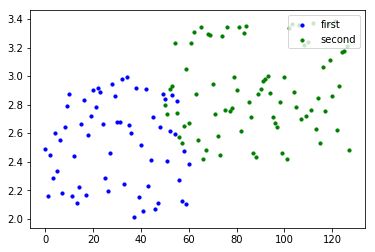

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', marker="o", label='first')
ax1.scatter(x2, y2, s=10, c='g', marker="o", label='second')
plt.legend(loc='upper right');
plt.show()

In [7]:
# centering 
A[:,:2] = A[:,:2]-A[:,:2].mean(0)

In [8]:
A[:,:2]

array([[ 5.11726619e+01,  6.18705036e-02],
       [-5.88273381e+01, -1.38129496e-01],
       [-8.82733813e+00,  4.61870504e-01],
       [ 1.51726619e+01,  6.18705036e-02],
       [-6.28273381e+01, -2.38129496e-01],
       [ 2.11726619e+01,  6.61870504e-01],
       [-1.38273381e+01,  1.61870504e-01],
       [-1.08273381e+01, -1.38129496e-01],
       [-3.82733813e+00, -6.38129496e-01],
       [ 6.41726619e+01, -2.38129496e-01],
       [ 6.01726619e+01,  1.61870504e-01],
       [-1.58273381e+01, -6.38129496e-01],
       [-1.78273381e+01, -3.81294964e-02],
       [-3.98273381e+01,  1.61870504e-01],
       [ 8.17266187e+00, -3.81294964e-02],
       [ 5.41726619e+01,  6.18705036e-02],
       [-8.82733813e+00, -1.38129496e-01],
       [-2.78273381e+01, -3.81294964e-02],
       [ 4.51726619e+01,  4.61870504e-01],
       [-2.18273381e+01, -6.38129496e-01],
       [ 6.11726619e+01,  4.61870504e-01],
       [ 4.61726619e+01, -3.81294964e-02],
       [-1.82733813e+00,  4.61870504e-01],
       [ 4.

In [9]:
temp = np.ones((A.shape[0], A.shape[1]+1))
temp[:,1:] = A.copy()
X = np.copy(temp[:,:-1])
y = np.copy(temp[:,-1])

In [10]:
X

array([[ 1.00000000e+00,  5.11726619e+01,  6.18705036e-02],
       [ 1.00000000e+00, -5.88273381e+01, -1.38129496e-01],
       [ 1.00000000e+00, -8.82733813e+00,  4.61870504e-01],
       [ 1.00000000e+00,  1.51726619e+01,  6.18705036e-02],
       [ 1.00000000e+00, -6.28273381e+01, -2.38129496e-01],
       [ 1.00000000e+00,  2.11726619e+01,  6.61870504e-01],
       [ 1.00000000e+00, -1.38273381e+01,  1.61870504e-01],
       [ 1.00000000e+00, -1.08273381e+01, -1.38129496e-01],
       [ 1.00000000e+00, -3.82733813e+00, -6.38129496e-01],
       [ 1.00000000e+00,  6.41726619e+01, -2.38129496e-01],
       [ 1.00000000e+00,  6.01726619e+01,  1.61870504e-01],
       [ 1.00000000e+00, -1.58273381e+01, -6.38129496e-01],
       [ 1.00000000e+00, -1.78273381e+01, -3.81294964e-02],
       [ 1.00000000e+00, -3.98273381e+01,  1.61870504e-01],
       [ 1.00000000e+00,  8.17266187e+00, -3.81294964e-02],
       [ 1.00000000e+00,  5.41726619e+01,  6.18705036e-02],
       [ 1.00000000e+00, -8.82733813e+00

In [11]:
y

array([0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0.])

In [12]:
def sigm(x):
    return 1/(np.exp(-x)+1)

In [13]:
def accuracy_score(y, y_pred):
    return (y == y_pred).astype(int).sum()/y.shape[0]

In [14]:
def train(X_, y_, batch_size, epochs, eta):
    theta = np.random.rand(X.shape[1])
    
    for i in range(epochs):
        print('accuracy: ', accuracy_score(y_, sigm(theta.T@ X_.T).squeeze()>0.5))
        rand_idxs = np.random.randint(X.shape[0], size=batch_size)
        X_Batch = X_[rand_idxs]
        Y_batch = y_[rand_idxs]
        grad = 0
        batch_loss = 0
        for xx, yy in zip(X_Batch, Y_batch):
            grad += xx*(sigm(theta.T@xx)-yy)
            batch_loss += (1-yy)*np.log(1-sigm(theta.T@xx) + 1e-6) + yy*np.log(sigm(theta.T@xx)+ 1e-6)
        print('batch loss: ', -batch_loss)
        theta = theta - (1/X_Batch.shape[0])*eta*grad
    
    return theta

In [15]:
theta = train(X, y, 64, 1000, 0.001)

accuracy:  0.07913669064748201
batch loss:  218.78776935122337
accuracy:  0.08633093525179857
batch loss:  163.63137299216595
accuracy:  0.12949640287769784
batch loss:  109.16350314796597
accuracy:  0.38848920863309355
batch loss:  71.31466069321301
accuracy:  0.43884892086330934
batch loss:  49.01116389917424
accuracy:  0.48201438848920863
batch loss:  42.225252387564254
accuracy:  0.6258992805755396
batch loss:  34.36980875966256
accuracy:  0.7050359712230215
batch loss:  33.79281290572215
accuracy:  0.7410071942446043
batch loss:  22.551656545121112
accuracy:  0.7553956834532374
batch loss:  26.443804565127454
accuracy:  0.7697841726618705
batch loss:  22.942583350145107
accuracy:  0.7769784172661871
batch loss:  29.62110366622318
accuracy:  0.7841726618705036
batch loss:  31.071124073900176
accuracy:  0.7985611510791367
batch loss:  24.616951790777495
accuracy:  0.7985611510791367
batch loss:  23.56140657613859
accuracy:  0.8057553956834532
batch loss:  21.756064812602215
accuracy

accuracy:  0.8561151079136691
batch loss:  13.079165399642077
accuracy:  0.8561151079136691
batch loss:  10.362185588068284
accuracy:  0.8561151079136691
batch loss:  10.690284259680904
accuracy:  0.8561151079136691
batch loss:  15.272751886436579
accuracy:  0.8561151079136691
batch loss:  14.627500475385286
accuracy:  0.8561151079136691
batch loss:  17.83705376684207
accuracy:  0.8561151079136691
batch loss:  11.905503247855481
accuracy:  0.8561151079136691
batch loss:  18.133161374686843
accuracy:  0.8561151079136691
batch loss:  21.650504726293114
accuracy:  0.8561151079136691
batch loss:  17.754378787530225
accuracy:  0.8561151079136691
batch loss:  23.450963931794288
accuracy:  0.8561151079136691
batch loss:  13.059919603445705
accuracy:  0.8561151079136691
batch loss:  16.003758128454802
accuracy:  0.8561151079136691
batch loss:  18.314241084007968
accuracy:  0.8561151079136691
batch loss:  23.18525777488683
accuracy:  0.8561151079136691
batch loss:  10.686515736715265
accuracy: 

accuracy:  0.8561151079136691
batch loss:  17.8206331236975
accuracy:  0.8561151079136691
batch loss:  22.80955674728759
accuracy:  0.8561151079136691
batch loss:  16.587878669311994
accuracy:  0.8561151079136691
batch loss:  10.525831237226956
accuracy:  0.8561151079136691
batch loss:  13.985578268039864
accuracy:  0.8561151079136691
batch loss:  19.488102753630134
accuracy:  0.8561151079136691
batch loss:  16.83250914059671
accuracy:  0.8561151079136691
batch loss:  26.163789322782513
accuracy:  0.8561151079136691
batch loss:  25.508121089597356
accuracy:  0.8561151079136691
batch loss:  18.426254852887837
accuracy:  0.8561151079136691
batch loss:  16.652823795368874
accuracy:  0.8561151079136691
batch loss:  15.60185735852725
accuracy:  0.8561151079136691
batch loss:  11.802232336958678
accuracy:  0.8561151079136691
batch loss:  24.63916986584123
accuracy:  0.8561151079136691
batch loss:  12.802200475009132
accuracy:  0.8561151079136691
batch loss:  23.9645852058715
accuracy:  0.856

batch loss:  12.902352764056362
accuracy:  0.8633093525179856
batch loss:  10.577334725961174
accuracy:  0.8633093525179856
batch loss:  25.135764553720826
accuracy:  0.8633093525179856
batch loss:  14.413462675120021
accuracy:  0.8633093525179856
batch loss:  13.913857663106715
accuracy:  0.8633093525179856
batch loss:  21.467933438715978
accuracy:  0.8633093525179856
batch loss:  25.66662014973507
accuracy:  0.8633093525179856
batch loss:  17.83128189850141
accuracy:  0.8633093525179856
batch loss:  16.987212470682422
accuracy:  0.8633093525179856
batch loss:  23.06745644010739
accuracy:  0.8633093525179856
batch loss:  26.428570098212123
accuracy:  0.8633093525179856
batch loss:  21.784279464920655
accuracy:  0.8633093525179856
batch loss:  19.617311848790393
accuracy:  0.8633093525179856
batch loss:  24.154337374123983
accuracy:  0.8633093525179856
batch loss:  25.682452655738622
accuracy:  0.8633093525179856
batch loss:  13.623934209751466
accuracy:  0.8633093525179856
batch loss:

batch loss:  13.828595565323157
accuracy:  0.8633093525179856
batch loss:  13.33301768992509
accuracy:  0.8633093525179856
batch loss:  16.78714622625193
accuracy:  0.8633093525179856
batch loss:  27.11564850161726
accuracy:  0.8633093525179856
batch loss:  18.014562571433466
accuracy:  0.8633093525179856
batch loss:  17.705486219518694
accuracy:  0.8633093525179856
batch loss:  19.072869635777185
accuracy:  0.8633093525179856
batch loss:  22.452858663833492
accuracy:  0.8633093525179856
batch loss:  15.995978720494483
accuracy:  0.8633093525179856
batch loss:  12.21595584500144
accuracy:  0.8633093525179856
batch loss:  19.306488509963955
accuracy:  0.8633093525179856
batch loss:  22.143098555450727
accuracy:  0.8633093525179856
batch loss:  10.100659384182885
accuracy:  0.8633093525179856
batch loss:  19.71061637024771
accuracy:  0.8633093525179856
batch loss:  16.137408125504017
accuracy:  0.8633093525179856
batch loss:  20.931304833823475
accuracy:  0.8633093525179856
batch loss:  

batch loss:  15.565856920126896
accuracy:  0.8633093525179856
batch loss:  11.179975343371908
accuracy:  0.8633093525179856
batch loss:  21.231230903962803
accuracy:  0.8633093525179856
batch loss:  8.366420160191627
accuracy:  0.8633093525179856
batch loss:  21.26855893969703
accuracy:  0.8633093525179856
batch loss:  12.187532087494786
accuracy:  0.8633093525179856
batch loss:  14.127880013761775
accuracy:  0.8633093525179856
batch loss:  16.830814875123487
accuracy:  0.8633093525179856
batch loss:  20.5416399643398


In [16]:
# test dataset

y1_test = np.array([np.random.rand(1) + 2 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y2_test = np.array([np.random.rand(1) + 2.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])

x1_test = np.array(range(len(y1_test)))
x2_test = np.array([c+50 for c in range(len(y2_test))])

a1_test = np.concatenate((x1_test.reshape(-1,1),y1_test,np.array([1 for c in range(len(x1_test))]).reshape(-1,1)), 1)
a2_test = np.concatenate((x2_test.reshape(-1,1),y2_test,np.array([0 for c in range(len(x2_test))]).reshape(-1,1)), 1)

A_test = np.concatenate((a1_test,a2_test), 0).round(1)
np.random.shuffle(A_test)

In [17]:
# centering
A_test[:,:2] = A_test[:,:2]-A_test[:,:2].mean(0)

In [18]:
# temp_test = np.ones((A_test.shape[0], A_test.shape[1]+1))
# temp_test[:,1:] = A_test
# X_test = temp_test[:,:-1]
# y_test = temp_test[:,-1]
temp_test = np.ones((A_test.shape[0], A_test.shape[1]+1))
temp_test[:,1:] = A_test.copy()
X_test = np.copy(temp_test[:,:-1])
y_test = np.copy(temp_test[:,-1])

In [19]:
X_test

array([[ 1.00000000e+00, -4.68333333e+01,  6.66666667e-04],
       [ 1.00000000e+00,  2.41666667e+01,  6.00666667e-01],
       [ 1.00000000e+00,  1.21666667e+01, -9.93333333e-02],
       [ 1.00000000e+00,  4.01666667e+01, -2.99333333e-01],
       [ 1.00000000e+00, -2.98333333e+01,  1.00666667e-01],
       [ 1.00000000e+00, -1.28333333e+01, -6.99333333e-01],
       [ 1.00000000e+00,  3.61666667e+01,  2.00666667e-01],
       [ 1.00000000e+00, -5.18333333e+01, -3.99333333e-01],
       [ 1.00000000e+00, -3.08333333e+01, -4.99333333e-01],
       [ 1.00000000e+00, -6.83333333e+00,  6.66666667e-04],
       [ 1.00000000e+00,  5.16666667e+00,  6.00666667e-01],
       [ 1.00000000e+00,  1.81666667e+01,  3.00666667e-01],
       [ 1.00000000e+00,  2.01666667e+01,  1.00666667e-01],
       [ 1.00000000e+00, -2.58333333e+01,  3.00666667e-01],
       [ 1.00000000e+00, -5.88333333e+01,  6.66666667e-04],
       [ 1.00000000e+00, -6.28333333e+01, -3.99333333e-01],
       [ 1.00000000e+00, -3.68333333e+01

In [20]:
y_test

array([1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.])

In [21]:
def pred_logistic_regr(theta, data):
    return (sigm(theta.T@ data.T).squeeze()>0.5).astype(int)

In [22]:
y_pred_test = pred_logistic_regr(theta, X_test)

In [23]:
y_pred_test

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [24]:
accuracy_score(y_test,y_pred_test)

0.8666666666666667

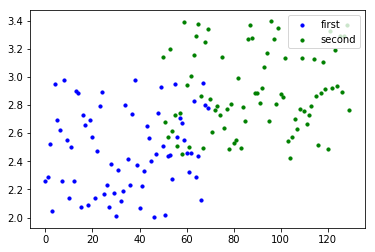

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1_test, y1_test, s=10, c='b', marker="o", label='first')
ax1.scatter(x2_test, y2_test, s=10, c='g', marker="o", label='second')
ax1.plot
plt.legend(loc='upper right');
plt.show()

In [26]:
def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

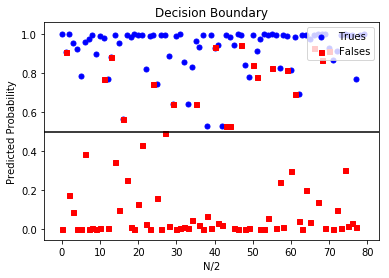

In [27]:
# plot for train  data
trues = sigm(theta.T@ X.T).squeeze()*((y + sigm(theta.T@ X.T).squeeze() >=0.5) > 0)
falses = sigm(theta.T@ X.T).squeeze()*(1-y + (sigm(theta.T@ X.T).squeeze() < 0.5) > 0)
plot_decision_boundary(trues[trues != 0], falses[falses != 0])

In [28]:
# train accuracy
accuracy_score(y, pred_logistic_regr(theta, X))

0.8633093525179856

In [29]:
# test accuracy
accuracy_score(y_test, pred_logistic_regr(theta, X_test))

0.8666666666666667

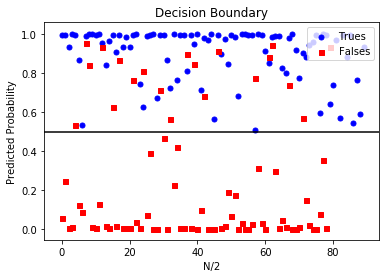

In [30]:
# plot for test  data
trues = sigm(theta.T@ X_test.T).squeeze()*((y_test + sigm(theta.T@ X_test.T).squeeze() >=0.5) > 0)
falses = sigm(theta.T@ X_test.T).squeeze()*(1-y_test + (sigm(theta.T@ X_test.T).squeeze() < 0.5) > 0)
plot_decision_boundary(trues[trues != 0], falses[falses != 0])

In [31]:
from  sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2')

In [32]:
lr.fit(X,y)

C:\Users\davidt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_test_lr = lr.predict(X_test)
y_test_lr

array([1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [34]:
y_pred_test

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [35]:
accuracy_score(y_test_lr, y_test)

0.86

In [36]:
accuracy_score(y_pred_test, y_test)

0.8666666666666667